In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline
import os,sys,inspect
currentdir = os.path.dirname(os.path.abspath(inspect.getfile(inspect.currentframe())))
parentdir = os.path.dirname(currentdir)
sys.path.insert(0,"../") 
from codes.functions.check_policy import load_info
import numpy as np
import qutip as qt
import matplotlib
import matplotlib.pyplot as plt
from IPython.display import HTML
from mpl_toolkits.axes_grid1.inset_locator import mark_inset, inset_axes, InsetPosition, BboxPatch, BboxConnector
import seaborn as sns
import matplotlib.gridspec as gridspec
#matplotlib.use('module://ipykernel.pylab.backend_inline')
from cycler import cycler
import matplotlib.font_manager as fm
import matplotlib.patheffects as path_effects
import matplotlib
from cycler import cycler
from IPython.display import SVG 
import scipy
import pandas as pd



plt.style.use('seaborn') 
fontsize = 12

mpl_settings = {
    'text.usetex': False,
    'font.family': 'sans-serif',
    'pgf.texsystem': 'pdflatex',
    'font.size': fontsize,
    
    'axes.labelsize': fontsize,               # -> axis labels
    'legend.fontsize': fontsize,              # -> legends
    'xtick.labelsize': fontsize,
    'ytick.labelsize': fontsize,
    'ytick.major.size': 3,
    'xtick.major.size': 3,
    'axes.linewidth': 2,
    'axes.edgecolor': "0.15",
    'figure.dpi': 300
}


plt.rcParams.update(mpl_settings)

/u/pori/.local/lib/python3.7/site-packages/tensorboard/compat/tensorflow_stub/dtypes.py:541: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/u/pori/.local/lib/python3.7/site-packages/tensorboard/compat/tensorflow_stub/dtypes.py:542: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/u/pori/.local/lib/python3.7/site-packages/tensorboard/compat/tensorflow_stub/dtypes.py:543: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/u/pori/.local/lib/python3.7/site-packages/tensorboard/compat/tensorflow_stub/dtypes.

The TensorFlow contrib module will not be included in TensorFlow 2.0.
For more information, please see:
  * https://github.com/tensorflow/community/blob/master/rfcs/20180907-contrib-sunset.md
  * https://github.com/tensorflow/addons
  * https://github.com/tensorflow/io (for I/O related ops)
If you depend on functionality not listed there, please file an issue.



/u/pori/conda-envs/conda_env/lib/python3.7/site-packages/stable_baselines/__init__.py:33: UserWarning: stable-baselines is in maintenance mode, please use [Stable-Baselines3 (SB3)](https://github.com/DLR-RM/stable-baselines3) for an up-to-date version. You can find a [migration guide](https://stable-baselines3.readthedocs.io/en/master/guide/migration.html) in SB3 documentation.
  "stable-baselines is in maintenance mode, please use [Stable-Baselines3 (SB3)](https://github.com/DLR-RM/stable-baselines3) for an up-to-date version. You can find a [migration guide](https://stable-baselines3.readthedocs.io/en/master/guide/migration.html) in SB3 documentation."


In [2]:
from matplotlib.font_manager import findfont, FontProperties
font = findfont(FontProperties(family=['sans-serif']))
font

'/zeropoint/u/pori/conda-envs/conda_env/lib/python3.7/site-packages/matplotlib/mpl-data/fonts/ttf/DejaVuSans.ttf'

# Figure 3

In [3]:
summaries_fock3 = np.load("data/summaries_fock3.npy", allow_pickle=True)

actions_focks = np.load("data/actions_focks.npy", allow_pickle=True)
fidelities_focks = np.load("data/fidelities_focks.npy", allow_pickle=True)
probabilities_focks = np.load("data/probabilities_focks.npy", allow_pickle=True)
rhos_focks = np.load("data/rhos_focks.npy", allow_pickle=True)

summaries_focks = np.load("data/summaries_focks.npy", allow_pickle=True)


successes = np.load("data/successes_strong_meas.npy", allow_pickle=True)


folder="training/2021-03-02_fock_new_v8"

direc=folder+"/training_0"
args = load_info(direc, print=False)
substeps = args["substeps"]




In [4]:
greedy = {}
with open("training/2020-10_optimal_alpha/23_10_20_optimal_analytical_solution_out_focks_second_v7.0.txt", "r") as f:
    lines = f.readlines()
    for line in lines:
        greedy[str(line.split(" ")[0])] = np.mean([float(x) for x in line.split(" ")[1:]])
greedy = list({k: v for k, v in sorted(greedy.items(), key=lambda item: item[0])}.values())


In [5]:
target=3
num_traj=0
timesteps_partial=600
Nstates_partial=10
min_len = 200
num_subfolders = len(summaries_fock3)

color1 = "cornflowerblue"
color2 = "lightcoral"

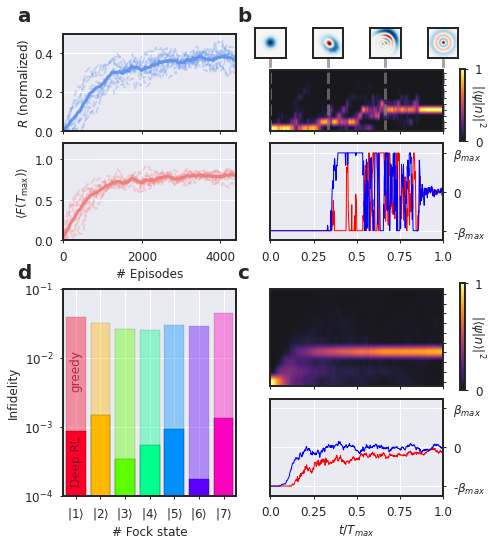

In [6]:
%matplotlib inline
scale = 1.7
fig = plt.figure(figsize=(4*scale,5*scale))

gs = fig.add_gridspec(13, 2, hspace=0.5)



ax_training_rew = fig.add_subplot(gs[:3, 0])

ax_training_prob = fig.add_subplot(gs[3:6, 0], sharex = ax_training_rew)
ax_training_prob.margins(0.0)

ax_hist = fig.add_subplot(gs[7:, 0])
ax_prob_3 = fig.add_subplot(gs[1:3, 1])
ax_actions_3 = fig.add_subplot(gs[3:6, 1], sharex = ax_prob_3)
ax_prob_3_mean = fig.add_subplot(gs[7:10, 1])
ax_actions_3_mean = fig.add_subplot(gs[-3:, 1], sharex = ax_prob_3_mean)



plt.setp(ax_training_rew.get_xticklabels(), visible=False)
plt.setp(ax_prob_3.get_xticklabels(), visible=False)

ax_actions_3.margins(0.0)


plt.setp(ax_prob_3_mean.get_xticklabels(), visible=False)

ax_actions_3_mean.margins(0.0)


N=10
xlist=np.linspace(0, summaries_fock3[0]["ep"] * summaries_fock3[0]["ntraj"], min_len-N+1)


for i in range(num_subfolders):
    mov_av=np.convolve(summaries_fock3[i]["total_rewards"][:min_len], np.ones(N)/N, mode='valid')
    ax_training_rew.plot(xlist, mov_av, linestyle="dashed", alpha=0.3, color=color1)
    
    mov_av=np.convolve(summaries_fock3[i]["probs_final"][:min_len], np.ones(N)/N, mode='valid')
    ax_training_prob.plot(xlist, mov_av, linestyle="dashed", alpha=0.3, color=color2)
    



    
mov_av = np.convolve(np.mean([x["total_rewards"][:min_len] for x in summaries_fock3], axis=0), np.ones(N)/N, mode='valid')
ax_training_rew.plot(xlist, mov_av, lw=3, color=color1)    
mov_av = np.convolve(np.mean([x["probs_final"][:min_len] for x in summaries_fock3], axis=0), np.ones(N)/N, mode='valid')
ax_training_prob.plot(xlist, mov_av, lw=3, color=color2)


ax_training_prob.set_xlabel("# Episodes")
ax_training_rew.set_ylabel(r"$R$ (normalized)")

ax_training_prob.set_xlim(0, summaries_fock3[0]["ep"] * summaries_fock3[0]["ntraj"])
ax_training_rew.set_ylim(0, 0.5)
ax_training_prob.set_ylim(0, 1.2)
ax_training_prob.set_ylabel(r"$\langle F(T_{\rm max}) \rangle$")






cmap = plt.cm.gist_rainbow
#cmap = plt.cm.Pastel1
c = cycler('color', cmap(np.linspace(0,1,7)) )
plt.rcParams["axes.prop_cycle"] = c
ax_hist.bar(np.arange(1,8,1), 1-np.sort(fidelities_focks, axis=1)[:, -48:, -1].mean(axis=1), 
            color=plt.rcParams['axes.prop_cycle'].by_key()['color'], 
            alpha=1.0, edgecolor="k")


a=0.7
cmap = [list(color[:3]*a) + [1.] for color in plt.rcParams['axes.prop_cycle'].by_key()['color']]

# ax_hist.bar(np.arange(1,8,1), successes[1:8], 
#             color=cmap, edgecolor="k")

plt.rcParams['axes.prop_cycle'] = cycler(color='bgrcmyk')

#ax_hist.hlines(1, -1, 8, linestyle = "dashed", lw =2 , color="black", clip_on = True)
#plt.bar(np.arange(1,8,1), [x["probs_final"][-1] for x in summaries], color="green", alpha=0.4)
ax_hist.xaxis.set(ticks=np.arange(1,8), ticklabels=[r"$|{{{}}}\rangle$".format(i) for i in range(1,8)])
ax_hist.set_xlabel("# Fock state")
ax_hist.set_ylabel(r"Infidelity")
ax_hist.set_ylim(1E-4,1E-1)
ax_hist.set_yscale('log')
ax_hist.set_xlim(0.5,7.5)

 

# for i in range(7):   
#     coeff=0.056
#     if i==0:
#         y = np.ones(500)
#         y[-1]=0.99
#     else:
#         y = fidelities_focks[i,:,-1]
#     subax = fig.add_axes([0.151+coeff*(i),0.055,0.045,0.365])  
#     sns.kdeplot(y = y, 
#     #sns.distplot(np.array(summaries_focks[i]["probs_final"]), hist=False, kde=True, 
#                  color = 'darkgreen', 
#                  #hist_kws={'edgecolor':'black'},
#                  #kde_kws={'linewidth': 4, 'shade': True, "alpha": 1}, 
#                  ax=subax,  fill = True, alpha=1)
#     #plt.gca().invert_xaxis()
#     #subax.set_ylim(0,1)
#     subax.set_xlim(0,5000)
#     subax.axis('off')
    
    
    
    
    
for t_target in [0, int(timesteps_partial/3), int(timesteps_partial/3*2), int(timesteps_partial)]:    
    ax_prob_3.vlines(t_target, 0, Nstates_partial+3, 
              linestyle = "dashed", 
              color = "gray", 
              lw=3, alpha=0.7, clip_on=False)
    
    size = 0.5
    offset = -size/2
    frac = t_target / timesteps_partial
    subax = inset_axes(ax_prob_3, width="100%", height="100%",
                   bbox_to_anchor=(frac+offset, 1.2, size, size),
                   bbox_transform=ax_prob_3.transAxes, loc=2, borderpad=0)
    #subax.axis('off')
    subax.set_xticks([])
    subax.set_yticks([])
    xwigner = np.linspace(-3, 3, 100)
    wigner = qt.wigner( qt.Qobj(rhos_focks[t_target]), xwigner, xwigner,)
    subax.imshow(wigner,
                cmap="RdBu", vmin=-np.max(np.abs(wigner)), vmax=np.max(np.abs(wigner)))


#ax.imshow( np.transpose(np.abs(np.diagonal(rhos,axis1=1, axis2=2))[:timesteps,:Nstates]),
im_prob_3 = ax_prob_3.imshow( probabilities_focks[num_traj, :Nstates_partial,:timesteps_partial*substeps],
                                       origin='lower',
                                       aspect='auto', 
                                       vmin=0,
                                       vmax=1,
                                       cmap="inferno",
                                       alpha=0.9, interpolation=None,
                                       extent=(0, timesteps_partial, 0, Nstates_partial)
                                    )
ax_prob_3.set_xlim(0,timesteps_partial)
ax_prob_3.set_ylim(0,Nstates_partial)
ax_prob_3.grid(False)
#ax_prob_3.set_yticks([])
labels = list(np.arange(Nstates_partial))
for i in np.arange(0, Nstates_partial, 1):
    labels[i] = ""
ax_prob_3.yaxis.set(ticks=np.arange(0.5, Nstates_partial), ticklabels=labels)
ax_prob_3.yaxis.set_ticks_position('right')
# for timestep_wigner in np.arange(0, timesteps_partial, int(timesteps_partial/5)):
#     ax_prob_3.axvline(timestep_wigner, 0 ,1.1, color="gray", linestyle="dashed", alpha=0.7, clip_on=False)
#     rel_x = timestep_wigner/timesteps_partial
#     ax_wigner = fig.add_axes([0.5+rel_x, 1., 0.05, 0.05], clip_on=False)
#     #ax_wigner.axis('off')
#     ax_wigner.set_xticks([])
#     ax_wigner.set_yticks([])
#     xwigner = np.linspace(-5, 5, 100)
#     #wigner=np.random.rand(100, 100)
#     wigner = qt.wigner(qt.Qobj(rhos_focks[target-1, num_traj, timestep_wigner]), xwigner, xwigner)
#     ax_wigner.imshow(wigner, cmap="RdBu")

#ax[0].vlines(timesteps_partial-2,0,Nstates_partial, color="red", linestyle="dashed")
#ax.text(timesteps,Nstates+1,"Mean fidelity: \n{}".format(round(np.mean(np.array(fidelities)[:,:,timesteps_partial-1]),4)),ha="center", color="red")




ax_actions_3.set_xlim(0,timesteps_partial)
ax_actions_3.set_ylim(-25,25)
ax_actions_3.set_yticks([])
ax_actions_3.plot(actions_focks[target-1, num_traj, 0,:timesteps_partial], label="Real", lw=1, color="red")
ax_actions_3.plot(actions_focks[target-1, num_traj, 1,:timesteps_partial], label="Img", lw=1, color="blue")

# ax=fig.add_subplot(gs[2, :])
# for index, action in enumerate(range(2,6)):
#     ax.set_xlim(0,timesteps_partial)
#     ax.set_ylim(0,1)
#     ax.plot(actions[0, action,:timesteps_partial], label="Meas {}".format(index))
# ax.legend()







#ax.imshow( np.transpose(np.abs(np.diagonal(rhos,axis1=1, axis2=2))[:timesteps,:Nstates]),
im_prob_3_mean = ax_prob_3_mean.imshow( probabilities_focks.mean(axis=0)[:Nstates_partial,:timesteps_partial*substeps],
                                       origin='lower',
                                       aspect='auto', 
                                       vmin=0,
                                       vmax=1,
                                       cmap="inferno",
                                       alpha=0.9, interpolation=None,
                                       extent=(0, timesteps_partial, 0, Nstates_partial)
                                    )
ax_prob_3_mean.set_xlim(0,timesteps_partial)
ax_prob_3_mean.set_ylim(0,Nstates_partial)
#ax[0].vlines(timesteps_partial-2,0,Nstates_partial, color="red", linestyle="dashed")
#ax.text(timesteps,Nstates+1,"Mean fidelity: \n{}".format(round(np.mean(np.array(fidelities)[:,:,timesteps_partial-1]),4)),ha="center", color="red")
ax_prob_3_mean.grid(False)
ax_prob_3_mean.yaxis.set(ticks=np.arange(0.5, Nstates_partial), ticklabels=labels)
ax_prob_3_mean.yaxis.set_ticks_position('right')


ax_actions_3_mean.set_xlim(0,timesteps_partial)
ax_actions_3_mean.set_ylim(-25,25)
ax_actions_3_mean.plot(actions_focks.mean(axis=1)[target-1, 0,:timesteps_partial], label="Real", lw=1, color="red")
ax_actions_3_mean.plot(actions_focks.mean(axis=1)[target-1, 1,:timesteps_partial], label="Img", lw=1, color="blue")

# ax=fig.add_subplot(gs[2, :])
# for index, action in enumerate(range(2,6)):
#     ax.set_xlim(0,timesteps_partial)
#     ax.set_ylim(0,1)
#     ax.plot(actions[0, action,:timesteps_partial], label="Meas {}".format(index))
# ax.legend()
ax_actions_3_mean.set_xlabel(r"$t/T_{max}$")

ax_actions_3.yaxis.set(ticks=[-20, 0, 20], ticklabels=[r"-$\beta_{max}$", "0", r"$\beta_{max}$"])
ax_actions_3_mean.yaxis.set(ticks=[-20, 0, 20], ticklabels=[r"-$\beta_{max}$", "0", r"$\beta_{max}$"])
ax_actions_3.yaxis.set_ticks_position('right')
ax_actions_3_mean.yaxis.set_ticks_position('right')

# for timestep_wigner in np.arange(0, timesteps_partial, int(timesteps_partial/5)):
#     ax_actions_3_mean.axvline(timestep_wigner, 0 ,1.1, color="gray", linestyle="dashed", alpha=0.7, clip_on=False)
#     rel_x = timestep_wigner/timesteps_partial-timestep_wigner/timesteps_partial/9
#     ax_wigner = fig.add_axes([rel_x, 1., 0.15, 0.15], clip_on=False)
#     ax_wigner.set_xticks([])
#     ax_wigner.set_yticks([])
#     xwigner = np.linspace(-3, 3, 100)
#     #wigner=np.random.rand(100, 100)
#     wigner = qt.wigner(qt.Qobj(rhos_focks.mean(axis=1)[target-1, timestep_wigner]), xwigner, xwigner)
#     ax_wigner.imshow(wigner, cmap="RdBu")

ax_actions_3.xaxis.set(ticks=np.linspace(0,timesteps_partial, 5),  ticklabels=np.linspace(0, 1, 5, endpoint=True))
ax_actions_3_mean.xaxis.set(ticks=np.linspace(0,timesteps_partial, 5), ticklabels=np.linspace(0, 1, 5, endpoint=True))

from mpl_toolkits.axes_grid1 import make_axes_locatable

cax = fig.add_axes([0.935, 0.705, 0.01, 0.118])
cbar = fig.colorbar(im_prob_3, cax=cax, orientation='vertical')
cbar.set_ticks([0, 1])
cbar.set_label(r"$|\langle \psi | n \rangle|^2$", rotation=270)
#ax_prob_3_mean.set_ylabel(r"$|\langle \psi | \psi_{{t}} \rangle|^2$")

cax = fig.add_axes([0.935, 0.298, 0.01, 0.175])
cbar = fig.colorbar(im_prob_3_mean, cax=cax, orientation='vertical')
cbar.set_ticks([0, 1])
cbar.set_label(r"$|\langle \psi | n \rangle|^2$", rotation=270)

cmap = plt.cm.gist_rainbow
c = cycler('color', cmap(np.linspace(0,1,7)) )
plt.rcParams["axes.prop_cycle"] = c

ax_hist.bar(np.arange(1,8,1), 1-np.array(greedy), 
            color=plt.rcParams['axes.prop_cycle'].by_key()['color'], 
            alpha=0.4, edgecolor="k")
fonts = 20
fig.text(0.03, 0.9, "a",  fontweight='bold', fontsize=fonts)
fig.text(0.48, 0.9, "b",  fontweight='bold', fontsize=fonts)
fig.text(0.03, 0.48, "d",  fontweight='bold', fontsize=fonts)
fig.text(0.48, 0.48, "c",  fontweight='bold', fontsize=fonts)

color = list(matplotlib.rcParams['axes.prop_cycle'])[0]['color']
color[0] -= 0.5
fig.text(0.139, 0.145, "Deep RL", fontsize=12, rotation=90, color=color)


color = [list(color[:3]*a) + [1.] for color in plt.rcParams['axes.prop_cycle'].by_key()['color']][0]
color[0]*= 1.5
color[-1] = 0.7
fig.text(0.137, 0.3, "greedy", fontsize=12, rotation=90, color=color)
plt.savefig("figure3.pdf", format="pdf", dpi=300, bbox_inches='tight', pad_inches=0)
plt.show()

In [85]:
color

[0.175, 0.0, 0.11199999999999999, 1.0]

## Animation

In [5]:
snapshots = np.empty((timesteps_partial*substeps,Nstates_partial, timesteps_partial*substeps))
snapshots.fill(np.nan)
for timestep in range(snapshots.shape[0]):
    snapshots[timestep, :, :timestep+1] = probabilities_focks[target-1, num_traj, :Nstates_partial, :timestep+1]

xwigner = np.linspace(-3, 3, 100)
wigners = [qt.wigner( qt.Qobj(rhos_focks[target-1, num_traj, t_target]), xwigner, xwigner) for t_target in range(rhos_focks.shape[2])]

<IPython.core.display.Javascript object>


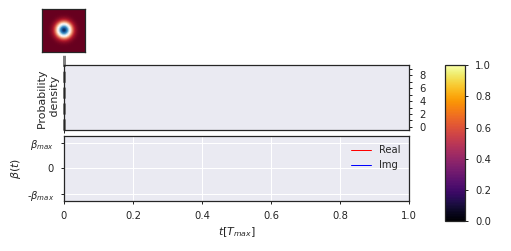

............Done!


In [16]:
# Usually we use `%matplotlib inline`. However we need `notebook` for the anim to render in the notebook.
%matplotlib notebook
import random
import numpy as np
from matplotlib.lines import Line2D
import matplotlib
import matplotlib.pyplot as plt

import matplotlib.animation as animation

factor = 100

nSeconds = 1
fps = int(timesteps_partial / nSeconds / factor)
# fps = 30
# nSeconds = 5
#snapshots = [ np.random.rand(5,5) for _ in range( nSeconds * fps ) ]

# First set up the figure, the axis, and the plot element we want to animate

fig = plt.figure(figsize=(3.5*2.028,3.5), frameon=False)
ax_fake = plt.Axes(fig, [0., -0.4, 1., 1.])
ax_fake.set_axis_off()
fig.add_axes(ax_fake)

import matplotlib.gridspec as gridspec
gs = gridspec.GridSpec(5, 8)
ax_prob_3 = plt.subplot(gs[1:3, :7])
#ax_prob_3 = fig.add_subplot(312)
plt.setp(ax_prob_3.get_xticklabels(), visible=False)
ax_actions_3 = plt.subplot(gs[-2:, :7], sharex = ax_prob_3)
#ax_actions_3 = fig.add_subplot(313, sharex = ax_prob_3)
ax_actions_3.margins(0.0)


from matplotlib.axes._axes import _make_inset_locator



N=10
xlist = np.linspace(0, summaries_fock3[0]["ep"] * summaries_fock3[0]["ntraj"], min_len-N+1)

ax_prob_3.set_xlim(0,timesteps_partial)
ax_prob_3.set_ylim(0,Nstates_partial)
#ax_prob_3.set_yticks([])
labels = list(np.arange(Nstates_partial))
for i in np.arange(1, Nstates_partial, 2):
    labels[i] = ""
ax_prob_3.yaxis.set(ticks=np.arange(0.5, Nstates_partial), ticklabels=labels)
ax_prob_3.yaxis.set_ticks_position('right')

myline = Line2D([0,0],[0,Nstates_partial+3],linestyle = "dashed", 
              color = "gray", 
              alpha = 1, lw=3, clip_on=False)
ax_prob_3.add_line(myline)
ax_prob_3.grid(False)

for t_target in [0]:    
#     line3 = ax_prob_3.vlines(t_target, 0, Nstates_partial+3, 
#               linestyle = "dashed", 
#               color = "gray", 
#               alpha = 0.5, lw=2, clip_on=False)

    offset = -0.35
    frac = t_target / timesteps_partial
#     subax = inset_axes(ax_prob_3, width="100%", height="100%",
#                    bbox_to_anchor=(frac+offset, 1.2, .7, .7),
#                    bbox_transform=ax_prob_3.transAxes, loc=2, borderpad=0)

    ratio = 2/3
    subax = plt.axes([0, 0, 1, 1])
    ip = InsetPosition(ax_prob_3, [frac-.2*ratio/2, 1.2, .2*ratio, 1*ratio] )
    subax.set_axes_locator(ip)
    #subax.axis('off')
    subax.set_xticks([])
    subax.set_yticks([])
    
    im_wigner = subax.imshow(wigners[0],
                cmap="RdBu")




ax_actions_3.set_xlim(0,1)
ax_actions_3.set_ylim(-25,25)
ax_actions_3.yaxis.set(ticks=[-20, 0, 20], ticklabels=[r"-$\beta_{max}$", "0", r"$\beta_{max}$"])
line1 = ax_actions_3.plot(actions_focks[target-1, num_traj, 0,:0], label="Real", lw=1, color="red")
line2 = ax_actions_3.plot(actions_focks[target-1, num_traj, 1,:0], label="Img", lw=1, color="blue")
ax_actions_3.xaxis.set(ticks=[0, 200, 400, 600, 800, 1000], ticklabels=[0, 0.2, 0.4, 0.6, 0.8, 1.0])
ax_actions_3.legend(loc = 1)
ax_actions_3.set_ylabel(r"$\beta(t)$")
im = ax_prob_3.imshow( snapshots[0],
               origin='lower',
               aspect='auto', 
               vmin=0,
               vmax=1,
               cmap="inferno",
               alpha=0.9, interpolation="none",
               extent=(0, 1, 0, Nstates_partial)
                )
ax_actions_3.set_xlabel(r"$t[T_{max}]$")
ax_prob_3.set_ylabel("Probability \n density")



def animate_func(i):
    if i % fps == 0:
        print( '.', end ='' )
    timestep = int( factor*i )
    timestep_action = int(timestep/substeps)
    if i>=100:
        timestep -= 1
        timestep_action -=1 
    im.set_array(snapshots[timestep])
    line1[0].set_data(np.arange(timestep_action),
                  actions_focks[target-1, num_traj, 0, :timestep_action])
    line2[0].set_data(np.arange(timestep_action),
                  actions_focks[target-1, num_traj, 1, :timestep_action])
    myline.set_data([timestep/timesteps_partial/substeps, timestep/timesteps_partial/substeps], [0,Nstates_partial+3])
    
    im_wigner.set_array(wigners[timestep_action])
    
    
    
    frac = timestep_action / timesteps_partial
    pos = [frac+offset, 1.2, .7, .7]
    ip = InsetPosition(ax_prob_3, [frac-.2*ratio/2, 1.2, .2*ratio, 1*ratio] )
    subax.set_axes_locator(ip)

    return [im]


ax_prob_3.margins(0.0)
#fig.subplots_adjust(right=0.85)
cbar_ax = fig.add_axes([0.87, 0.12, 0.04, 0.62])
fig.colorbar(im, cax=cbar_ax)

fig.subplots_adjust(bottom=0.2)

FFMpegWriter = animation.writers['ffmpeg']
metadata = dict(title='Movie Test', artist='Matplotlib',
                comment='Movie support!')

# Change the video bitrate as you like and add some metadata.
writer = FFMpegWriter(fps=fps, bitrate=-1, metadata=metadata)




anim = animation.FuncAnimation(
                               fig, 
                               animate_func, 
                               frames = int(timesteps_partial*substeps/factor)+1,
                               interval = nSeconds / int(timesteps_partial), # in ms,
                                repeat=True, 
                               )








anim.save('test_anim.mp4', writer=writer, dpi=1000)
# HTML(anim.to_jshtml())
print('Done!')